In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [2]:
names=['rssi-1', 'rssi-2', 'rssi-3', 'rssi-4','rssi-5','rssi-6','rssi-7','rssi-8','rssi-9','rssi-10','rssi-11','rssi-12','rssi-13','rssi-14','rssi-15','rssi-16','rssi-17','rssi-18', 'rssi-19', 'rssi-20', 'rssi-21','rssi-22','rssi-23','rssi-24','rssi-25','rssi-26','rssi-27','rssi-28','rssi-29','rssi-30','rssi-31','rssi-32','rssi-33','rssi-34','rssi-35', 'rssi-36', 'rssi-37', 'rssi-38','rssi-39','rssi-40','rssi-41','rssi-42','rssi-43','rssi-44','rssi-45','rssi-46','rssi-47','rssi-48','rssi-49','rssi-50','rssi-51','rssi-52', 'rssi-53', 'rssi-54', 'rssi-55','rssi-56','rssi-57','rssi-58','rssi-59','rssi-60','rssi-61','rssi-62','rssi-63','rssi-64','rssi-65','rssi-66','rssi-67','rssi-68','rssi-69', 'rssi-70', 'rssi-71', 'rssi-72','rssi-73','rssi-74','rssi-75','rssi-76','rssi-77','rssi-78','rssi-79','rssi-80','rssi-81','rssi-82','rssi-83','rssi-84','rssi-85','rssi-86', 'rssi-87', 'rssi-88', 'rssi-89','rssi-90','rssi-91','rssi-92','rssi-93','rssi-94','rssi-95','rssi-96','rssi-97','rssi-98','rssi-99','rssi-100','rssi-101','rssi-102','rssi-103', 'rssi-104', 'rssi-105', 'rssi-106','rssi-107','rssi-108','rssi-109','rssi-110','rssi-111','rssi-112','rssi-113','rssi-114','rssi-115','rssi-116','rssi-117','rssi-118','rssi-119','rssi-120', 'rssi-121', 'rssi-122', 'rssi-123','rssi-124','rssi-125','rssi-126','rssi-127','zone']
data = pd.read_csv('measure1_smartphone_wifi_all.csv', names=names) 
#dataset.head()

In [3]:
data = data.drop('rssi-9', axis=1)
data = data.drop('rssi-10', axis=1)
data = data.drop('rssi-11', axis=1)
data = data.drop('rssi-12', axis=1)
data = data.drop('rssi-14', axis=1)
data = data.drop('rssi-15', axis=1)
data = data.drop('rssi-16', axis=1)
data = data.drop('rssi-25', axis=1)
data = data.drop('rssi-27', axis=1)
data = data.drop('rssi-62', axis=1)
data = data.drop('rssi-72', axis=1)
data = data.drop('rssi-73', axis=1)
data = data.drop('rssi-74', axis=1)
data = data.drop('rssi-81', axis=1)
data = data.drop('rssi-82', axis=1)
data = data.drop('rssi-83', axis=1)
data = data.drop('rssi-84', axis=1)
data = data.drop('rssi-85', axis=1)
data = data.drop('rssi-86', axis=1)
data = data.drop('rssi-87', axis=1)
data = data.drop('rssi-88', axis=1)
data = data.drop('rssi-89', axis=1)
data = data.drop('rssi-90', axis=1)
data = data.drop('rssi-91', axis=1)
data = data.drop('rssi-92', axis=1)
data = data.drop('rssi-93', axis=1)
data = data.drop('rssi-94', axis=1)
data = data.drop('rssi-95', axis=1)
data = data.drop('rssi-101', axis=1)
data = data.drop('rssi-109', axis=1)
data = data.drop('rssi-113', axis=1)
data = data.drop('rssi-114', axis=1)

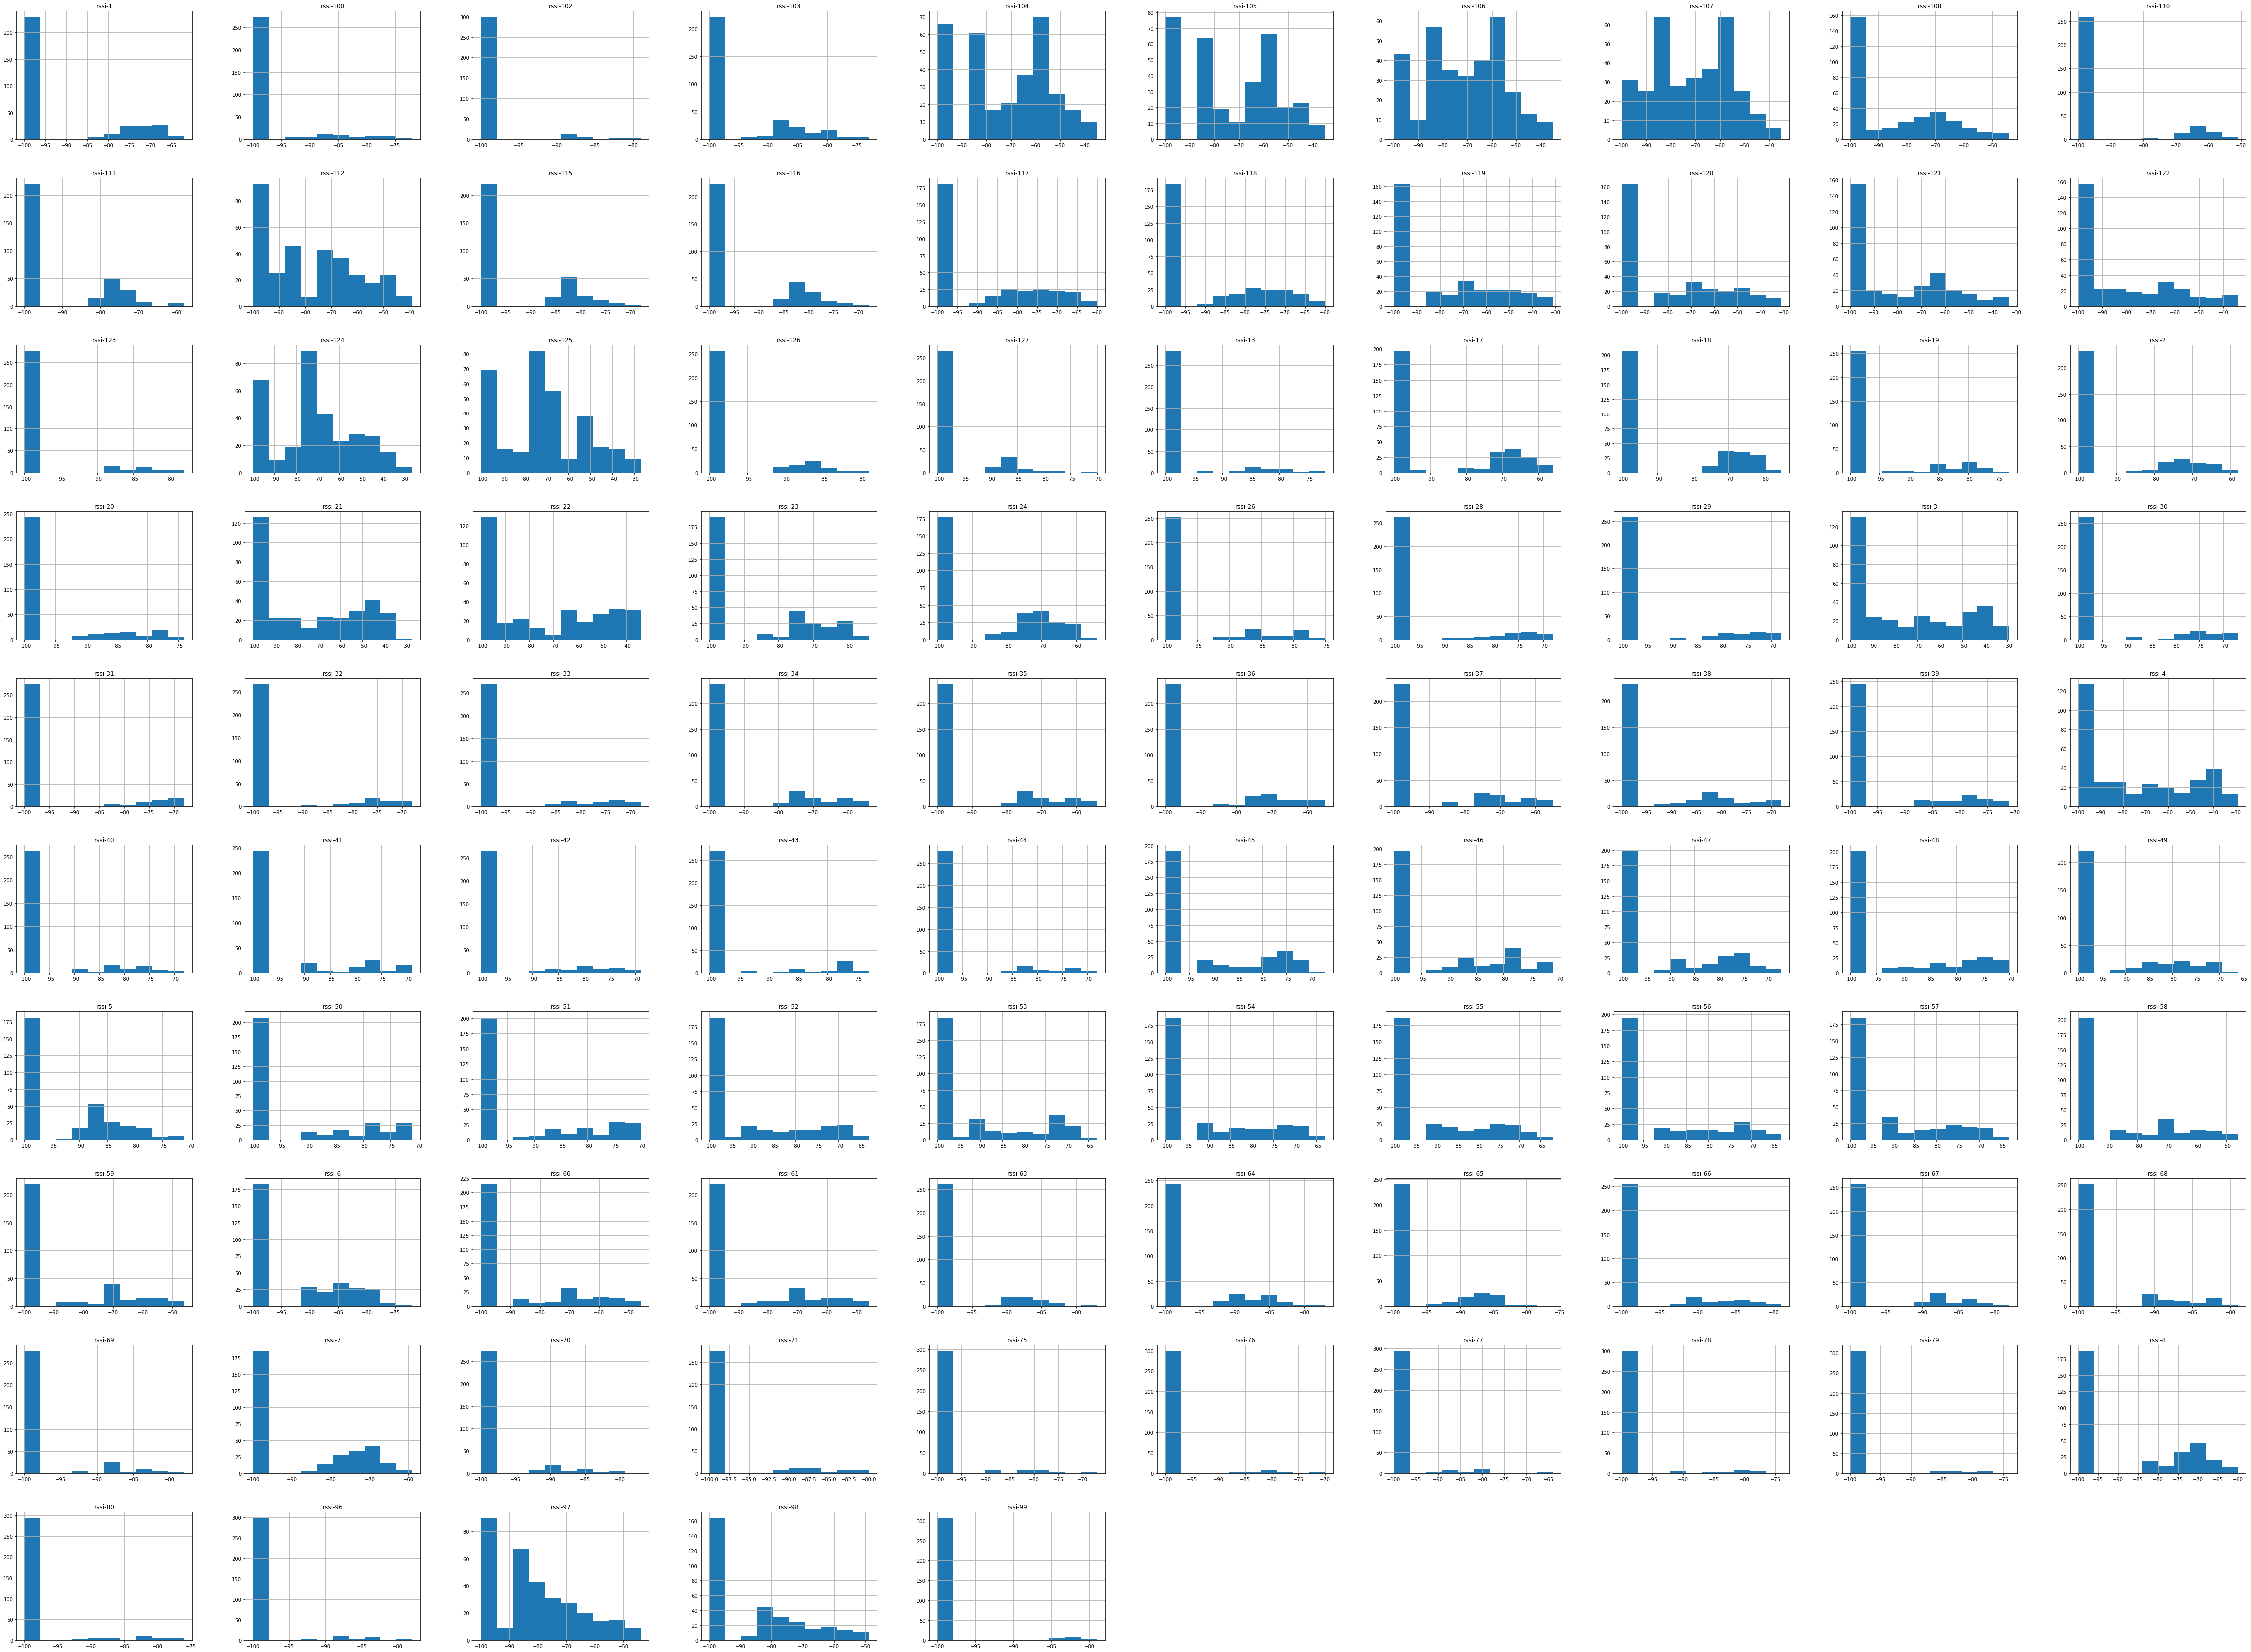

In [4]:
features = data.drop(['zone'], axis = 1)#64int iBeacon RSSI valued variables for data processing
%matplotlib inline
import matplotlib.pyplot as plt 
features.hist(figsize=(80,60))# Plotting all the beacons values 
#x axis = RSSI value
#y axis = number of data points at a perticular RSSI value
plt.savefig('wifi_HIstograms.png')
plt.show()

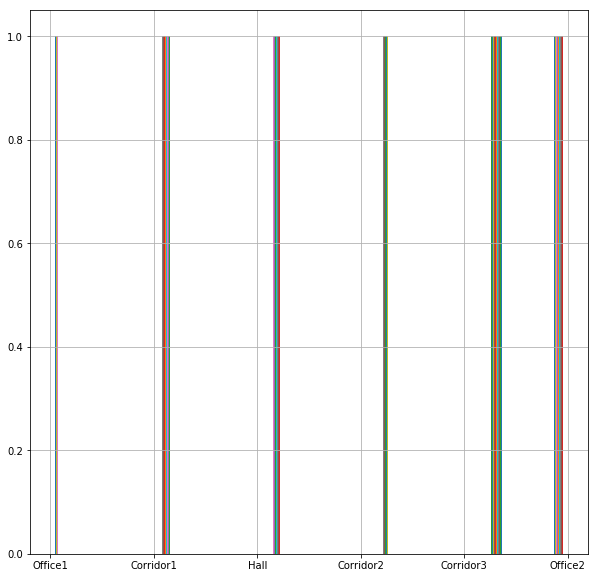

In [5]:
classes = data['zone'][:] #The output variable, location, isolated from labled dataframe
classes.hist(figsize=(10,10))# Plotting all the beacons values 
#x axis = Location
#y axis = number of data points at a perticular location
plt.savefig('class_histogram01.png')
plt.show()

In [6]:
from sklearn.preprocessing import OneHotEncoder
#Number the categories from 0 to 104
classes_encoded, classes_categories = pd.factorize(classes)
#One hot encoding
encoder = OneHotEncoder()
classes_1hot = encoder.fit_transform(classes_encoded.reshape(-1,1))
classes_categories 

Index(['Office1', 'Corridor1', 'Hall', 'Corridor2', 'Corridor3', 'Office2'], dtype='object')

(array([23.,  0., 62.,  0., 50.,  0., 36.,  0., 84., 70.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

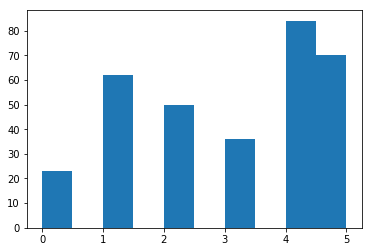

In [7]:
#The following histogram shows the number of points at each category in location variable
plt.hist(classes_encoded)

In [8]:
classes_1hot.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [9]:
#Correlation among the features
features.corr()

,rssi-1,rssi-2,rssi-3,rssi-4,rssi-5,rssi-6,rssi-7,rssi-8,rssi-13,rssi-17,...,rssi-118,rssi-119,rssi-120,rssi-121,rssi-122,rssi-123,rssi-124,rssi-125,rssi-126,rssi-127
rssi-1,1.000000,0.922724,0.470143,0.468724,-0.151539,-0.265706,0.555207,0.507691,-0.230757,0.442393,...,0.444722,-0.525964,-0.523993,-0.544263,-0.507785,-0.260907,0.722845,0.729121,-0.318810,-0.288116
rssi-2,0.922724,1.000000,0.466740,0.465305,-0.117557,-0.240005,0.572187,0.522297,-0.224958,0.433073,...,0.455565,-0.519524,-0.516961,-0.543993,-0.511955,-0.254351,0.717162,0.724393,-0.310799,-0.280876
rssi-3,0.470143,0.466740,1.000000,0.996350,-0.267501,-0.271399,0.906870,0.910162,-0.344857,0.891615,...,0.935144,-0.781281,-0.780727,-0.774978,-0.669862,-0.384234,0.539626,0.517957,-0.470251,-0.424588
rssi-4,0.468724,0.465305,0.996350,1.000000,-0.275577,-0.279135,0.906804,0.909969,-0.348095,0.889809,...,0.934468,-0.785170,-0.784371,-0.778436,-0.681178,-0.402176,0.541934,0.520543,-0.474317,-0.428961
rssi-5,-0.151539,-0.117557,-0.267501,-0.275577,1.000000,0.897562,-0.211481,-0.199320,0.481917,-0.235930,...,-0.231234,0.439107,0.435611,0.478938,0.416686,0.473881,-0.302704,-0.272420,0.475383,0.389545
rssi-6,-0.265706,-0.240005,-0.271399,-0.279135,0.897562,1.000000,-0.259624,-0.250887,0.493528,-0.248339,...,-0.258518,0.464660,0.460760,0.507208,0.454232,0.472400,-0.378027,-0.339632,0.497712,0.403862
rssi-7,0.555207,0.572187,0.906870,0.906804,-0.211481,-0.259624,1.000000,0.950351,-0.307611,0.868189,...,0.908091,-0.715029,-0.715150,-0.712198,-0.625607,-0.347803,0.539550,0.543307,-0.424990,-0.384074
rssi-8,0.507691,0.522297,0.910162,0.909969,-0.199320,-0.250887,0.950351,1.000000,-0.303661,0.889385,...,0.923124,-0.705427,-0.705921,-0.706473,-0.619373,-0.343336,0.511441,0.505473,-0.419532,-0.379142
rssi-13,-0.230757,-0.224958,-0.344857,-0.348095,0.481917,0.493528,-0.307611,-0.303661,1.000000,-0.283986,...,-0.295794,0.588090,0.584209,0.595439,0.529951,0.303127,-0.404249,-0.348909,0.351091,0.272248
rssi-17,0.442393,0.433073,0.891615,0.889809,-0.235930,-0.248339,0.868189,0.889385,-0.283986,1.000000,...,0.900838,-0.662432,-0.660653,-0.667068,-0.585349,-0.321092,0.428837,0.411149,-0.392351,-0.354577


In [10]:
from sklearn.model_selection import train_test_split
X = features
y = classes
#Deviding data into train, validate and test
#X_train1, X_test, y_train1, y_test indicates only train and test data groups
X_train1, X_test, y_train1, y_test =  train_test_split(X, y, test_size = 0.20, random_state =100)
#X_test, y_test,X_train, X_val, y_train,y_val indicates train, validation and test dat groups
X_train, X_val, y_train,y_val = train_test_split(X_train1, y_train1, test_size=0.20, random_state=400)

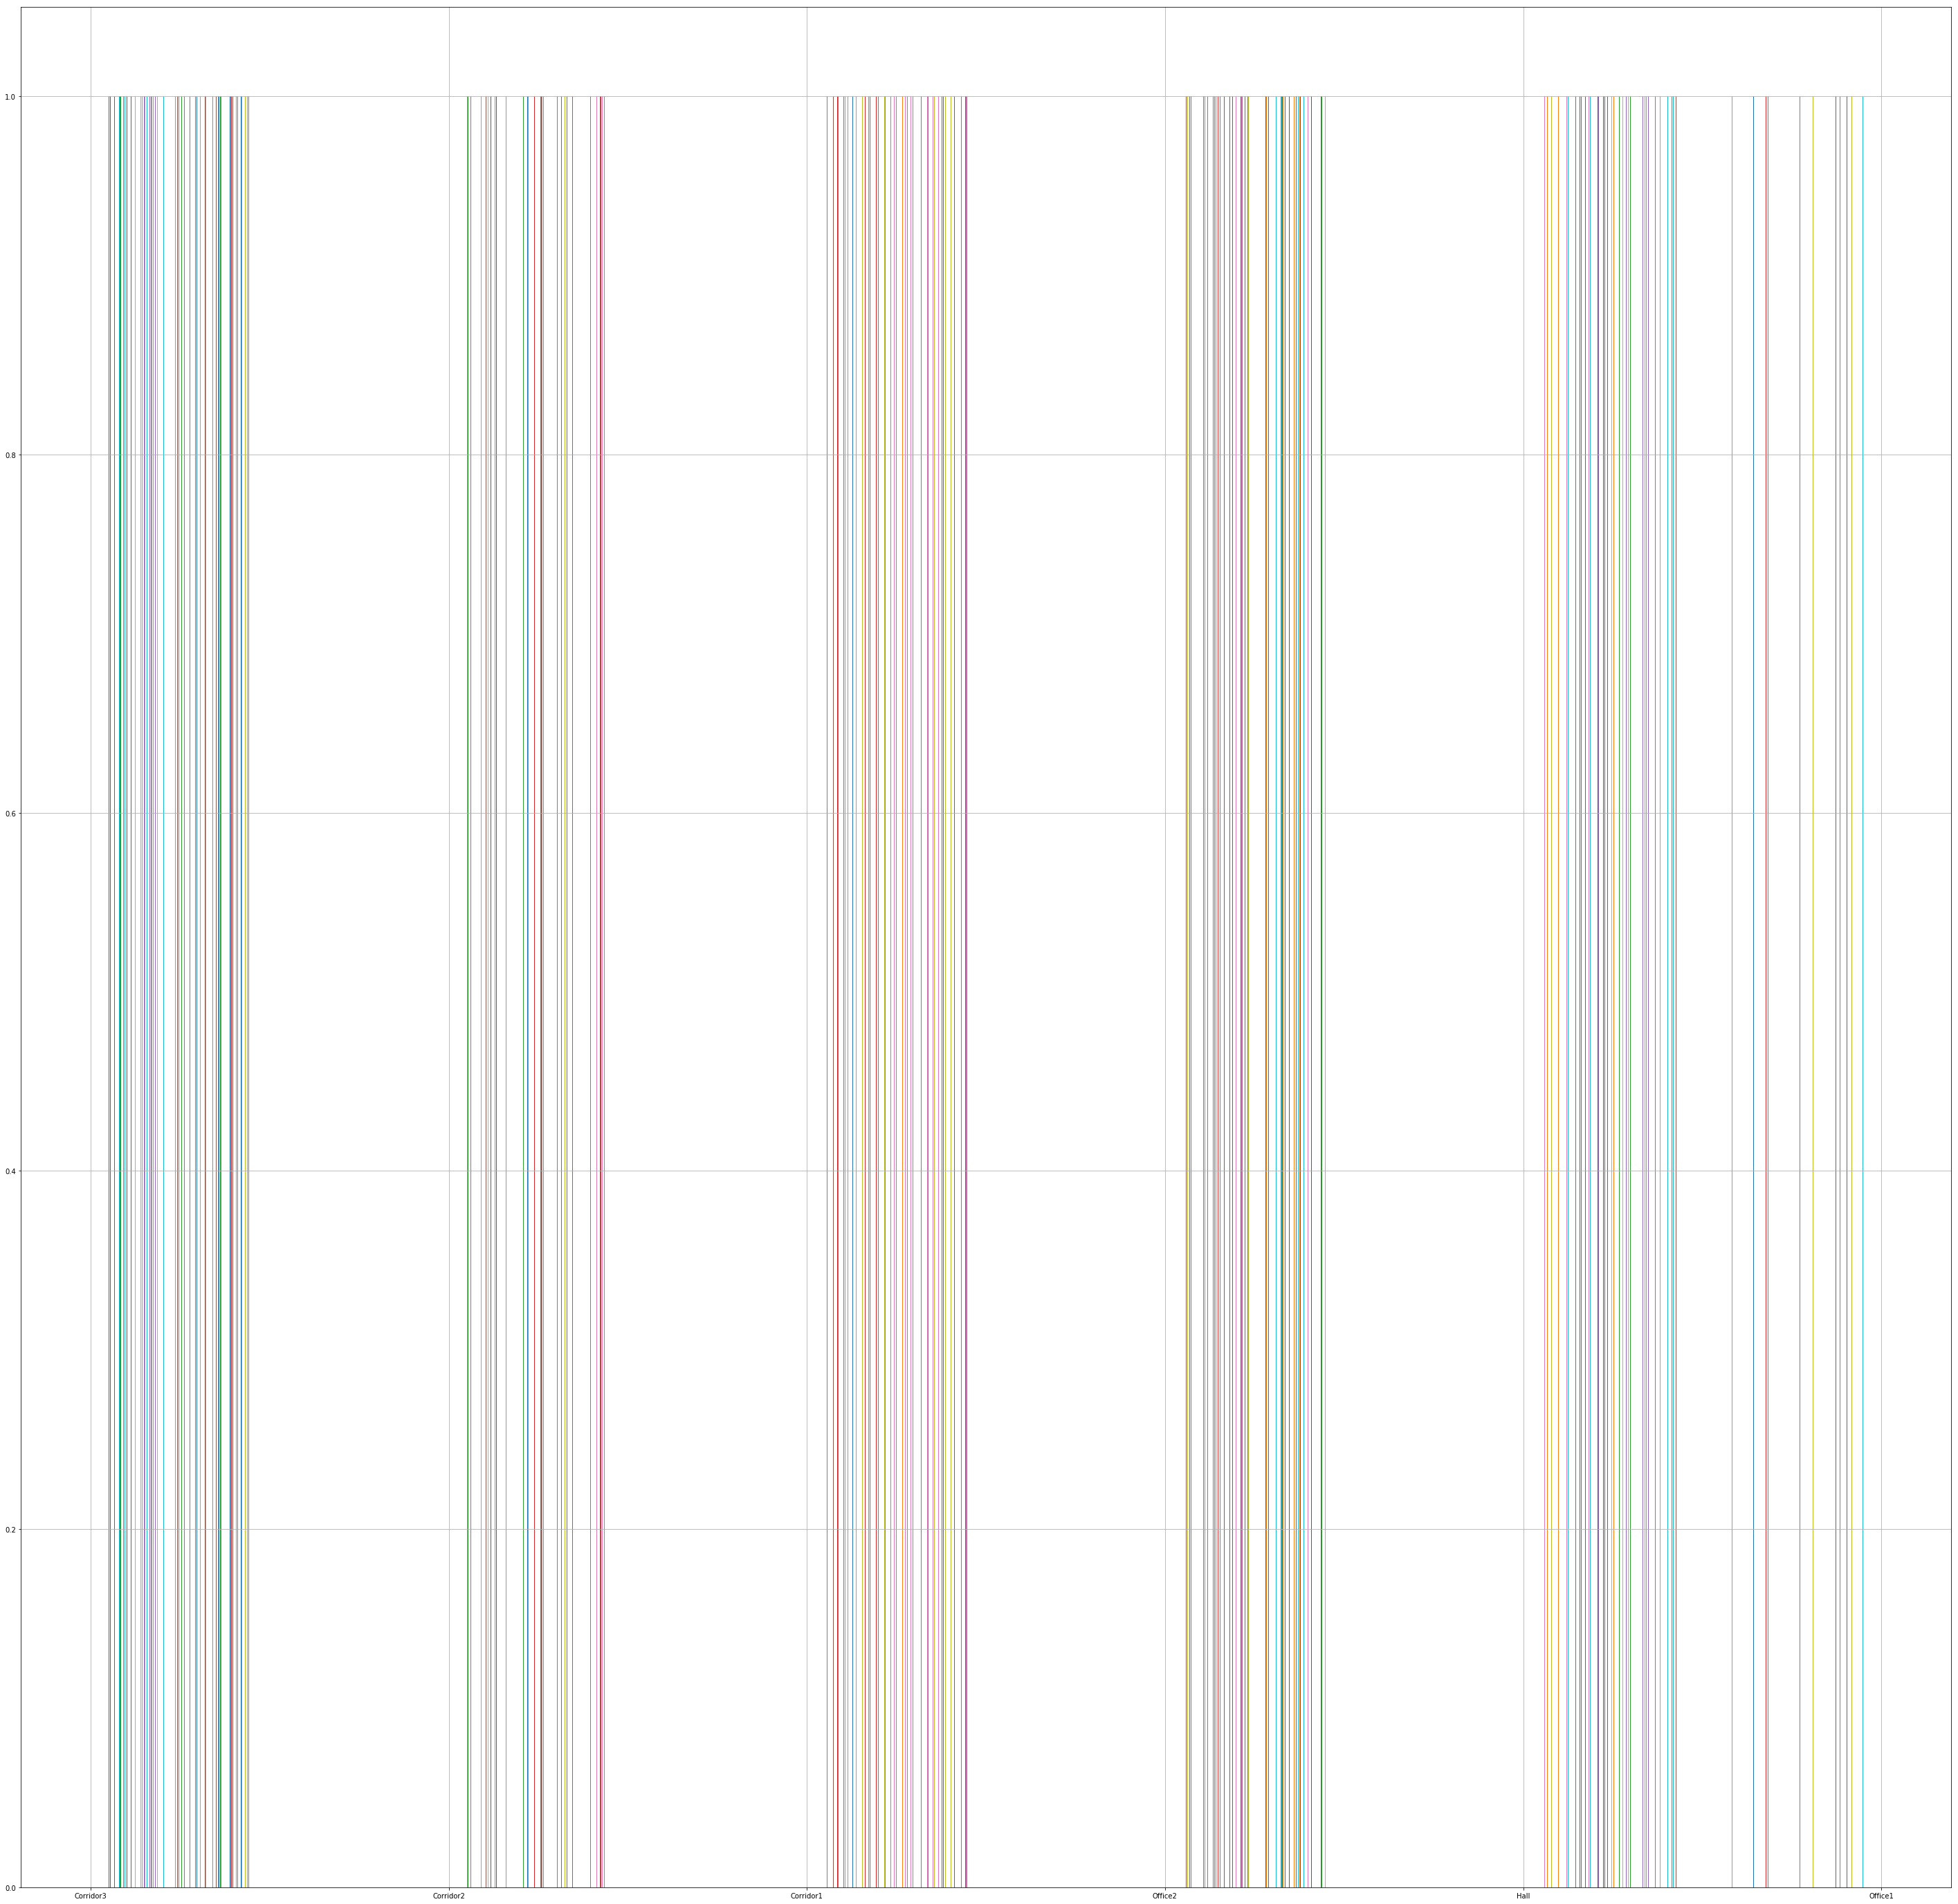

In [11]:
y_train1.hist(figsize=(50,50))# Plotting all the beacons values 
#x axis = Location
#y axis = number of data pointsat a perticular location
#plt.savefig('Leabeled_location_histogram_trainset1.png')
plt.show()

In [12]:
#The lengths of test, validation and test datasets
print('Length of X_train1, y_train1:',len(X_train1))
print('Length of X_train, y_train  :',len(X_train))
print('Length of X_val, y_val      :',len(X_val))
print('Length of X_test,y_test     :',len(X_test))

Length of X_train1, y_train1: 260
Length of X_train, y_train  : 208
Length of X_val, y_val      : 52
Length of X_test,y_test     : 65


# Logistic Regression

In [14]:
#Logistic Regression Model using default settings
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Performance analysis of default Logistic Regression Model
print('Logistic regression model score (Default): ',model_lr.score(X_test, y_test))
print(classification_report(y_test, model_lr.predict(X_test), digits=3))

Logistic regression model score (Default):  0.8
              precision    recall  f1-score   support

   Corridor1      0.778     0.583     0.667        12
   Corridor2      0.500     1.000     0.667         3
   Corridor3      0.917     0.917     0.917        24
        Hall      0.667     0.667     0.667         9
     Office1      1.000     0.800     0.889         5
     Office2      0.769     0.833     0.800        12

    accuracy                          0.800        65
   macro avg      0.772     0.800     0.768        65
weighted avg      0.816     0.800     0.801        65



C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Text(0,0.5,'Score')

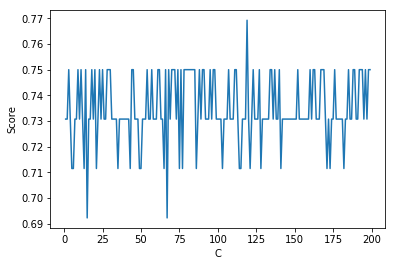

In [16]:
import numpy as np
#The following for loop finds the best value of C
score = [];
for x in range (1 , 200):
    model_lr.set_params(C =x)
    model_lr.fit(X_train, y_train)
    score.append(model_lr.score(X_val, y_val))
    
x = np.arange(1,200,1);
y1 = score
plt.plot(x, y1)
plt.xlabel('C')
plt.ylabel('Score')

In [17]:
#Visulization of the coefficints of the model
model_lr = LogisticRegression(multi_class='ovr', C = 5,penalty='l2')
model_lr.fit(X_train, y_train)
model_lr.coef_

C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ruban\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

array([[ 4.24477866e-02,  4.14960410e-02, -1.88540753e-02,
        -2.23274008e-01, -1.29309697e-01, -1.75323664e-01,
         7.64538706e-02, -4.42638597e-02,  1.41874444e-01,
        -1.67891547e-01,  1.46275713e-01,  3.72706685e-02,
        -8.31632077e-02,  1.80043779e-02, -4.26114189e-02,
        -2.81307002e-02, -1.00959398e-01,  6.12077820e-02,
        -2.37866695e-02, -2.71907463e-02,  8.02197326e-02,
        -1.07022927e-01,  8.47439767e-02,  3.16327112e-02,
        -1.98962323e-02, -9.59004495e-03, -1.24954435e-03,
        -1.26107470e-02,  2.54262039e-02,  9.74798122e-02,
         4.92321436e-02,  2.71350737e-02, -9.29852059e-02,
         3.29848328e-02,  2.18384760e-02,  4.85153112e-03,
         7.04233526e-02,  8.12828634e-02, -1.41430214e-01,
        -1.50558247e-03, -3.45675038e-02, -3.61405132e-02,
         2.52223112e-01, -4.13192861e-02,  8.71625274e-02,
         2.28653582e-02, -2.22832228e-01, -8.31797749e-03,
         1.58525149e-01,  2.83774882e-02, -9.61637968e-0

Text(0,0.5,'Score')

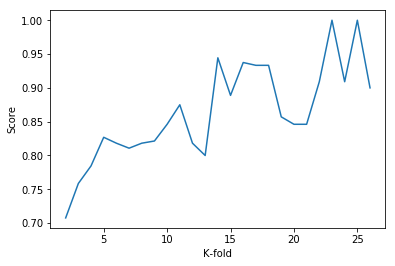

In [18]:
#Logistic regression model using K-fold CV
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
score = []
ary = []
for x in range (2 , 27):
    ary = cross_val_score(model_lr, X_train1, y_train1, cv=x)
    score.append(max(ary[:]))
    
x = np.arange(2,27,1);
y_1 = score
plt.plot(x,y_1)
plt.xlabel('K-fold')
plt.ylabel('Score')

In [19]:
#from the graph above, CV = 26 seems a good fit
cross_val_score(model_lr, X_train1, y_train1, cv=26)

array([0.6, 0.7, 0.8, 0.7, 0.6, 0.7, 0.9, 0.8, 0.8, 0.9, 0.7, 0.7, 0.9,
       0.7, 0.6, 0.7, 0.8, 0.8, 0.7, 0.8, 0.5, 0.8, 0.5, 0.6, 0.7, 0.9])

In [20]:
#Performance analysis of Logistic regression using K-fold cross validation
predicted = cross_val_predict(model_lr, X_test, y_test)
print('Logistic regression model score (k-fold cross validation): ',accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted, digits=3))

Logistic regression model score (k-fold cross validation):  0.7692307692307693
              precision    recall  f1-score   support

   Corridor1      0.818     0.750     0.783        12
   Corridor2      0.000     0.000     0.000         3
   Corridor3      0.880     0.917     0.898        24
        Hall      0.625     0.556     0.588         9
     Office1      0.667     0.800     0.727         5
     Office2      0.833     0.833     0.833        12

    accuracy                          0.769        65
   macro avg      0.637     0.643     0.638        65
weighted avg      0.768     0.769     0.767        65



# Grid Search CV

In [21]:
#Fine-tuning of the logistic regression model using grid search CV
from sklearn.model_selection import GridSearchCV

# Tuning parameters: Penalty & the inverse of regularization strength (C)
parameters = {'penalty':('l1', 'l2'), 'C':[5,6,7,8,9,10]}
model_lr2 = LogisticRegression()
grid_search_lr = GridSearchCV(model_lr2, parameters,cv=5)
grid_search_lr.fit(X_train1,y_train1)
grid_search_lr.best_params_ #shows the best params

{'C': 8, 'penalty': 'l2'}

In [22]:
#Performance analysis Logistic Regression using GridSearchCV 
print('Logistic regression model score (GridSearchCV): ',grid_search_lr.score(X_test, y_test))
print(classification_report(y_test, grid_search_lr.predict(X_test), digits=3))

Logistic regression model score (GridSearchCV):  0.7846153846153846
              precision    recall  f1-score   support

   Corridor1      0.636     0.583     0.609        12
   Corridor2      0.500     0.667     0.571         3
   Corridor3      0.917     0.917     0.917        24
        Hall      0.667     0.667     0.667         9
     Office1      1.000     0.800     0.889         5
     Office2      0.769     0.833     0.800        12

    accuracy                          0.785        65
   macro avg      0.748     0.744     0.742        65
weighted avg      0.790     0.785     0.786        65



In [23]:
X = data.drop('zone', axis=1)  
y = data['zone'] 

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

y_pred = svclassifier.predict(X_test)  

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 7  1  0  3  0  0]
 [ 0  3  3  1  0  0]
 [ 0  0 13  0  0  3]
 [ 4  1  0  2  0  0]
 [ 0  0  0  0  7  0]
 [ 1  0  0  0  0 16]]
              precision    recall  f1-score   support

   Corridor1       0.58      0.64      0.61        11
   Corridor2       0.60      0.43      0.50         7
   Corridor3       0.81      0.81      0.81        16
        Hall       0.33      0.29      0.31         7
     Office1       1.00      1.00      1.00         7
     Office2       0.84      0.94      0.89        17

    accuracy                           0.74        65
   macro avg       0.70      0.68      0.69        65
weighted avg       0.73      0.74      0.73        65



# SVM

In [24]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train) 

y_pred = svclassifier.predict(X_test)  

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 6  0  0  5  0  0]
 [ 3  3  1  0  0  0]
 [ 1  0 11  0  0  4]
 [ 1  0  1  5  0  0]
 [ 0  0  0  0  7  0]
 [ 1  0  0  0  0 16]]
              precision    recall  f1-score   support

   Corridor1       0.50      0.55      0.52        11
   Corridor2       1.00      0.43      0.60         7
   Corridor3       0.85      0.69      0.76        16
        Hall       0.50      0.71      0.59         7
     Office1       1.00      1.00      1.00         7
     Office2       0.80      0.94      0.86        17

    accuracy                           0.74        65
   macro avg       0.77      0.72      0.72        65
weighted avg       0.77      0.74      0.74        65



In [25]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

y_pred = svclassifier.predict(X_test)  

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 7  1  0  3  0  0]
 [ 0  3  3  1  0  0]
 [ 0  0 13  0  0  3]
 [ 4  1  0  2  0  0]
 [ 0  0  0  0  7  0]
 [ 1  0  0  0  0 16]]
              precision    recall  f1-score   support

   Corridor1       0.58      0.64      0.61        11
   Corridor2       0.60      0.43      0.50         7
   Corridor3       0.81      0.81      0.81        16
        Hall       0.33      0.29      0.31         7
     Office1       1.00      1.00      1.00         7
     Office2       0.84      0.94      0.89        17

    accuracy                           0.74        65
   macro avg       0.70      0.68      0.69        65
weighted avg       0.73      0.74      0.73        65

